In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
domestic_df= pd.read_csv('domestic_visitors.csv',usecols=['district','date','month','year','visitors'])
domestic_df

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990


In [3]:
foreign_df = pd.read_csv('foreign_visitors.csv')
foreign_df['visitors'] = foreign_df['visitors'].astype('int64')

In [4]:
foreign_df

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,0
1508,Yadadri Bhongir,01-09-2019,September,2019,0
1509,Yadadri Bhongir,01-10-2019,October,2019,0
1510,Yadadri Bhongir,01-11-2019,November,2019,0


In [5]:
combined= domestic_df.append(foreign_df)
combined

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,0
1508,Yadadri Bhongir,01-09-2019,September,2019,0
1509,Yadadri Bhongir,01-10-2019,October,2019,0
1510,Yadadri Bhongir,01-11-2019,November,2019,0


In [6]:
domestic_df.groupby('year').sum()

,visitors
year,
2016,95160830
2017,85266596
2018,92878329
2019,83035894


## #1 List down the top 10 districts that have the highest number of domestic visitors overall (2016-2019)?

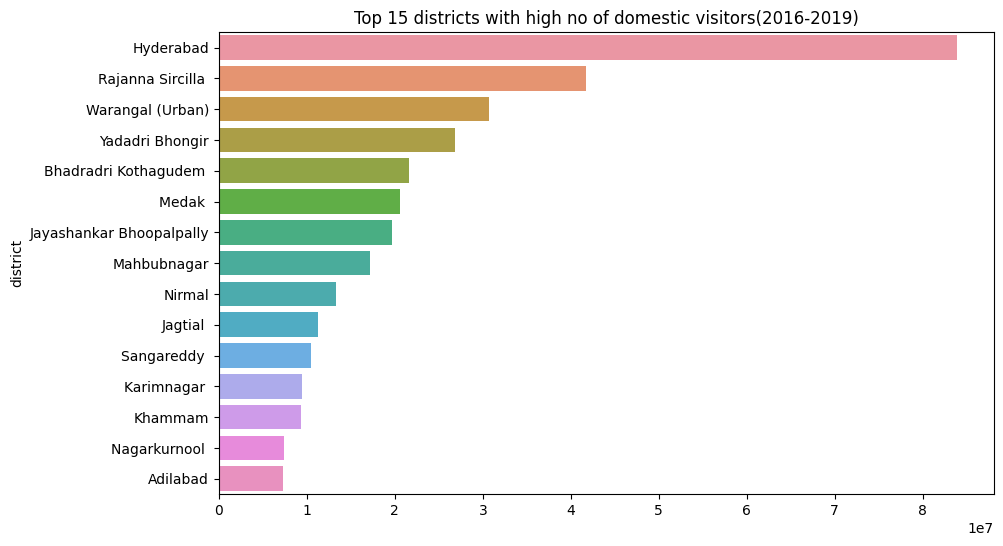

In [8]:
top_10=domestic_df.groupby('district')['visitors'].sum().sort_values(ascending=False)[:15]
plt.figure(figsize=(10,6))
sns.barplot(x=top_10.values,y= top_10.index)

plt.title('Top 15 districts with high no of domestic visitors(2016-2019)')
# for index,value in enumerate(x):
#     plt.text(index,value,str(value),ha='center',va='bottom',fontsize=8)
plt.show()

## #2 List down the top 3 & bottom 3 districts based on compound annual growth rate (CAGR) of  visitors between (2016-2019)?

In [95]:
cagr = ((v_final/v_initial)**(1/4)-1)*100
CAGR= cagr.sort_values(ascending=False)
CAGR

district
Mancherial                         inf
Nizamabad                          inf
Nagarkurnool                 61.850397
Jogulamba Gadwal             60.011934
Hyderabad                    18.190708
Warangal (Urban)              6.576212
Adilabad                    -11.988826
Jayashankar Bhoopalpally    -14.949178
Mahbubnagar                 -15.621221
Jangaon                    -100.000000
Bhadradri Kothagudem               NaN
Jagtial                            NaN
Kamareddy                          NaN
Karimnagar                         NaN
Khammam                            NaN
Komaram Bheem Asifabad             NaN
Mahabubabad                        NaN
Medak                              NaN
Medchal                            NaN
Mulugu                             NaN
Nalgonda                           NaN
Narayanpet                         NaN
Nirmal                             NaN
Peddapalli                         NaN
Rajanna Sircilla                   NaN
Ranga Reddy     

In [13]:
vi_dom= domestic_df[domestic_df['year']==2016].groupby('district')['visitors'].sum()
vf_dom= domestic_df[domestic_df['year']==2019].groupby('district')['visitors'].sum()

mcagr = ((vf_dom/vi_dom)**(1/3)-1)*100
mCAGR= mcagr.sort_values(ascending=False)
mCAGR

district
Komaram Bheem Asifabad             inf
Mancherial                  225.799714
Warangal (Rural)            163.145469
Bhadradri Kothagudem        143.387524
Siddipet                    102.767155
Jangaon                     100.737155
Rajanna Sircilla             97.748583
Nizamabad                    93.029299
Sangareddy                   80.209537
Peddapalli                   72.256899
Wanaparthy                   70.607917
Jagtial                      70.460384
Kamareddy                    61.403338
Nirmal                       60.880758
Jogulamba Gadwal             56.546259
Nagarkurnool                 52.651991
Jayashankar Bhoopalpally     39.624509
Yadadri Bhongir              37.456018
Medak                        16.334330
Mahabubabad                   2.977785
Hyderabad                   -16.128976
Mahbubnagar                 -32.670360
Khammam                     -34.391989
Adilabad                    -46.530464
Warangal (Urban)            -58.862874
Nalgonda        

In [14]:
mCAGR.replace([np.inf,np.nan],0,inplace=True)
dom_cagr_x=mCAGR.nlargest(3)
dom_cagr_x

district
Mancherial               225.799714
Warangal (Rural)         163.145469
Bhadradri Kothagudem     143.387524
Name: visitors, dtype: float64

In [15]:
dom_cagr_y=mCAGR.nsmallest(3)
dom_cagr_y

district
Karimnagar         -79.629550
Nalgonda           -71.133488
Warangal (Urban)   -58.862874
Name: visitors, dtype: float64

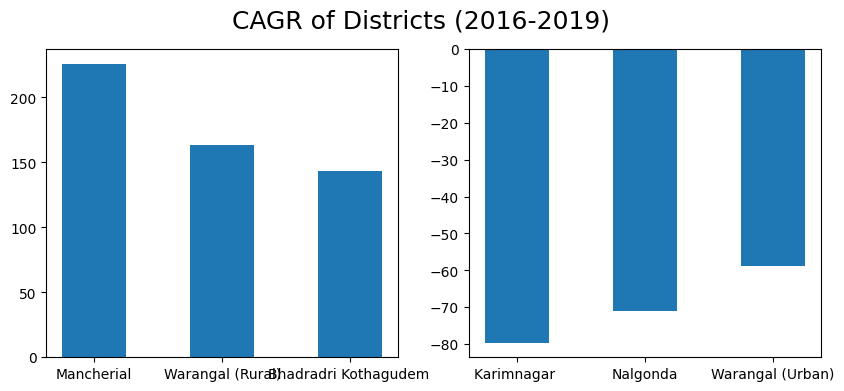

In [12]:
fig,ax= plt.subplots(1,2,figsize=(10,4))
ax[0].bar(dom_cagr_x.index, dom_cagr_x.values,width=0.5)
ax[1].bar(dom_cagr_y.index,dom_cagr_y.values,width=0.5)
plt.suptitle('CAGR of Districts (2016-2019)',fontsize=18)
plt.show()

In [16]:
vi_for= foreign_df[foreign_df['year']==2016].groupby('district')['visitors'].sum()
vf_for= foreign_df[foreign_df['year']==2019].groupby('district')['visitors'].sum()

fcagr = ((vf_for/vi_for)**(1/4)-1)*100
fCAGR= fcagr.sort_values(ascending=False)
fCAGR

district
Mancherial                         inf
Nizamabad                          inf
Nagarkurnool                 61.850397
Jogulamba Gadwal             60.011934
Hyderabad                    18.190708
Warangal (Urban)              6.576212
Adilabad                    -11.988826
Jayashankar Bhoopalpally    -14.949178
Mahbubnagar                 -15.621221
Jangaon                    -100.000000
Bhadradri Kothagudem               NaN
Jagtial                            NaN
Kamareddy                          NaN
Karimnagar                         NaN
Khammam                            NaN
Komaram Bheem Asifabad             NaN
Mahabubabad                        NaN
Medak                              NaN
Medchal                            NaN
Mulugu                             NaN
Nalgonda                           NaN
Narayanpet                         NaN
Nirmal                             NaN
Peddapalli                         NaN
Rajanna Sircilla                   NaN
Ranga Reddy     

In [17]:
fCAGR.replace([np.inf,np.nan],0,inplace=True)
for_cagr_x=fCAGR.nlargest(3)
for_cagr_x

district
Nagarkurnool         61.850397
Jogulamba Gadwal     60.011934
Hyderabad            18.190708
Name: visitors, dtype: float64

In [18]:
for_cagr_y=fCAGR.nsmallest(3)
for_cagr_y

district
Jangaon                    -100.000000
Mahbubnagar                 -15.621221
Jayashankar Bhoopalpally    -14.949178
Name: visitors, dtype: float64

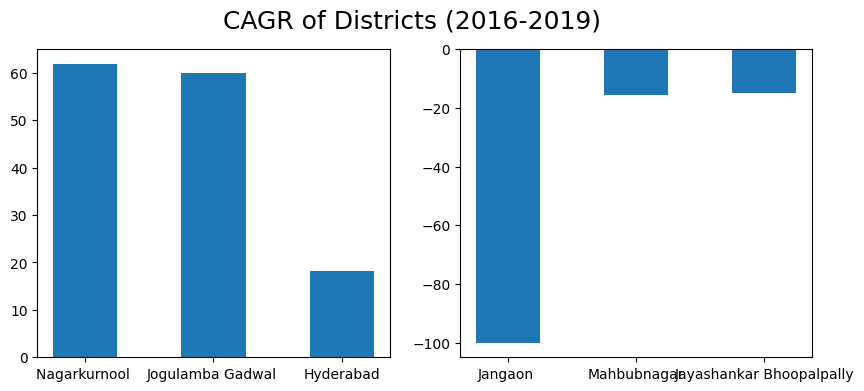

In [19]:
fig,ax= plt.subplots(1,2,figsize=(10,4))
ax[0].bar(for_cagr_x.index, for_cagr_x.values,width=0.5)

ax[1].bar(for_cagr_y.index,for_cagr_y.values,width=0.5)
plt.suptitle('CAGR of Districts (2016-2019)',fontsize=18)
plt.show()

## #3 What are the peak and low season months for Hyderabad based on the data from 2016 to 2019 for Hyderabad district?

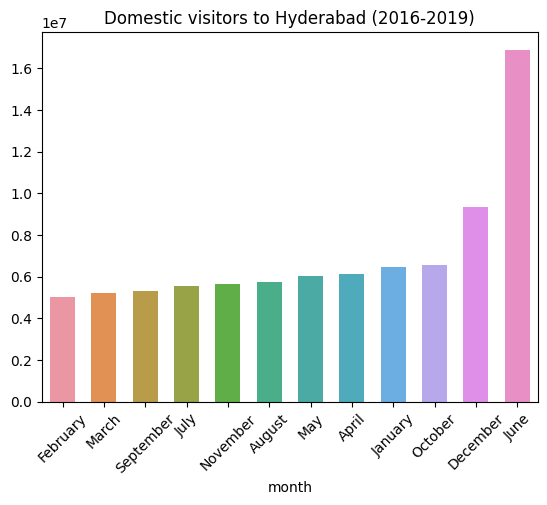

In [20]:
dom_hyd=domestic_df[domestic_df['district']=='Hyderabad'].groupby('month')['visitors'].sum().sort_values()
# plt.figure(figsize=(12,5))
sns.barplot(x=dom_hyd.index,y= dom_hyd.values,width=0.6)
plt.title('Domestic visitors to Hyderabad (2016-2019)')
plt.xticks(rotation=45)
# for index,value in enumerate(dom_hyd):
#     plt.text(index,value,str(value),ha='center',va='bottom',fontsize=8)
plt.show()

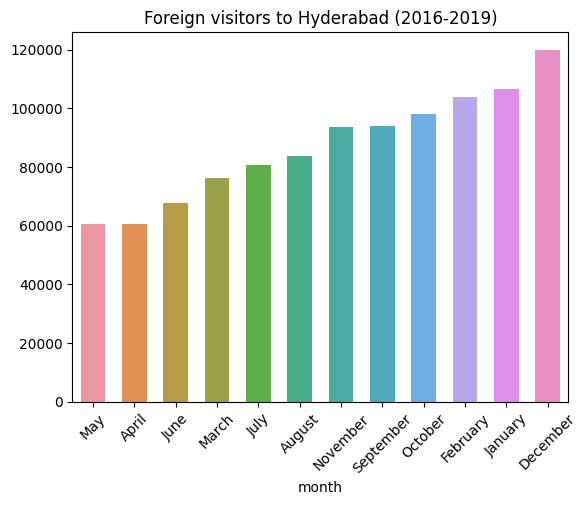

In [21]:
dom_hyd=foreign_df[foreign_df['district']=='Hyderabad'].groupby('month')['visitors'].sum().sort_values()
# plt.figure(figsize=(12,5))
sns.barplot(x=dom_hyd.index,y= dom_hyd.values,width=0.6)
plt.title('Foreign visitors to Hyderabad (2016-2019)')
plt.xticks(rotation=45)
# for index,value in enumerate(dom_hyd):
#     plt.text(index,value,str(value),ha='center',va='bottom',fontsize=8)
plt.show()

## #5 Show the top & bottom 3 districts with high domestic to foreign tourist ratio?

In [22]:
domestic_df.groupby('district')['visitors'].sum()

district
Adilabad                     7321575
Bhadradri Kothagudem        21600962
Hyderabad                   83900960
Jagtial                     11303514
Jangaon                       826280
Jayashankar Bhoopalpally    19632865
Jogulamba Gadwal             6813340
Kamareddy                       1773
Karimnagar                   9462383
Khammam                      9378315
Komaram Bheem Asifabad         92734
Mahabubabad                   600697
Mahbubnagar                 17180118
Mancherial                    867242
Medak                       20542639
Medchal                            0
Mulugu                       1819800
Nagarkurnool                 7424355
Nalgonda                     6401933
Narayanapet                   389250
Nirmal                      13315796
Nizamabad                     116147
Peddapalli                     56977
Rajanna Sircilla            41763276
Ranga Reddy                        0
Sangareddy                  10424510
Siddipet                     

In [23]:
dom = pd.DataFrame(domestic_df.groupby('district')['visitors'].sum())
foreign = pd.DataFrame(foreign_df.groupby('district')['visitors'].sum())
df= pd.merge(dom,foreign,on="district")
df['ratio'] = df['visitors_x']/ df['visitors_y']
df= df.where(df['visitors_y']>100)
df

,visitors_x,visitors_y,ratio
district,,,
Adilabad,NaN,NaN,NaN
Bhadradri Kothagudem,NaN,NaN,NaN
Hyderabad,83900960.0,1044898.0,80.295837
Jagtial,NaN,NaN,NaN
Jangaon,NaN,NaN,NaN
Jayashankar Bhoopalpally,19632865.0,1252.0,15681.202077
Jogulamba Gadwal,6813340.0,945.0,7209.883598
Kamareddy,NaN,NaN,NaN
Karimnagar,NaN,NaN,NaN


In [26]:
df.dropna(inplace= True)
df= df.sort_values(by='ratio',ascending=False)

In [27]:
df.ratio.nlargest()

district
Jayashankar Bhoopalpally    15681.202077
Nagarkurnool                 9756.051248
Mahbubnagar                  7528.535495
Jogulamba Gadwal             7209.883598
Warangal (Urban)             3483.346899
Name: ratio, dtype: float64

In [28]:
df.ratio.nsmallest(3)

district
Hyderabad             80.295837
Warangal (Rural)    2677.000000
Mulugu              3164.869565
Name: ratio, dtype: float64

In [33]:
population_df = pd.read_csv('Demographics.csv')
population_df

,Districts,Males,Females,Sex Ratio (Females per 1000 Males),Rural,Urban,Rural Population (%),Urban Population (%),Households,Total Population_2011,Total Population_2019,Total Visitors 2019,Total Visitors/Total Population
0,Adilabad,356407,352565,989,541226,167746,76.34,23.66,156683,708972,755637,755901,1.000349
1,Bhadradri Kothagudem,532390,536871,1008,730178,339083,68.29,31.71,279190,1069261,1139641,12817737,11.247171
2,Hyderabad,2018575,1924748,954,0,3943323,0.00,100.00,849051,3943323,4202876,14121662,3.360000
3,Jagtial,484079,501338,1036,764081,221336,77.54,22.46,253619,985417,1050278,3086115,2.938379
4,Jangaon,283648,282728,997,495019,71357,87.40,12.60,139238,566376,603655,328890,0.544831
5,Jayashankar Bhoopalpally,354203,357231,1009,657554,53880,92.43,7.57,189622,711434,758261,662575,0.873809
6,Jogulamba Gadwal,309274,300716,972,546813,63177,89.64,10.36,132261,609990,650140,2008290,3.089012
7,Kamareddy,478389,494236,1033,849003,123622,87.29,12.71,222513,972625,1036644,534,0.000515
8,Karimnagar,504620,501091,993,696727,308984,69.28,30.72,258485,1005711,1071908,77491,0.072293
9,Khammam,699124,702515,1005,1084811,316828,77.40,22.60,382929,1401639,1493896,1413440,0.946144


In [31]:
df_19 = combined[combined.year==2019].groupby('district')['visitors'].sum()
df_19

district
Adilabad                      775901
Bhadradri Kothagudem        12817737
Hyderabad                   14121662
Jagtial                      3086115
Jangaon                       328890
Jayashankar Bhoopalpally      662575
Jogulamba Gadwal             2008290
Kamareddy                        534
Karimnagar                     77491
Khammam                      1413440
Komaram Bheem Asifabad         19189
Mahabubabad                   152885
Mahbubnagar                  2535255
Mancherial                    269820
Medak                        5452570
Medchal                            0
Mulugu                       1820375
Nagarkurnool                 2093511
Nalgonda                      140918
Narayanapet                   389250
Narayanpet                         5
Nirmal                       3816778
Nizamabad                      46334
Peddapalli                     16581
Rajanna Sircilla            16832897
Ranga Reddy                        0
Sangareddy                   

In [34]:
population_df=population_df.sort_values(by='Total Visitors/Total Population',ascending=False)
population_df

,Districts,Males,Females,Sex Ratio (Females per 1000 Males),Rural,Urban,Rural Population (%),Urban Population (%),Households,Total Population_2011,Total Population_2019,Total Visitors 2019,Total Visitors/Total Population
21,Rajanna Sircilla,274109,277928,1014,435145,116892,78.83,21.17,138992,552037,588373,16832897,28.609227
1,Bhadradri Kothagudem,532390,536871,1008,730178,339083,68.29,31.71,279190,1069261,1139641,12817737,11.247171
14,Medak,378654,388774,1027,708574,58854,92.33,7.67,168677,767428,817941,5452570,6.666214
30,Yadadri Bhongir,374719,364729,973,616283,123165,83.34,16.66,180677,739448,788119,4489374,5.696315
18,Nirmal,346721,362697,1046,557736,151682,78.62,21.38,165763,709418,756113,3816778,5.047894
2,Hyderabad,2018575,1924748,954,0,3943323,0.00,100.00,849051,3943323,4202876,14121662,3.360000
6,Jogulamba Gadwal,309274,300716,972,546813,63177,89.64,10.36,132261,609990,650140,2008290,3.089012
3,Jagtial,484079,501338,1036,764081,221336,77.54,22.46,253619,985417,1050278,3086115,2.938379
23,Sangareddy,777235,750393,965,997663,529965,65.31,34.69,329208,1527628,1628178,4553160,2.796476
24,Siddipet,504141,507924,1008,873013,139052,86.26,13.74,238049,1012065,1078680,2987864,2.769926


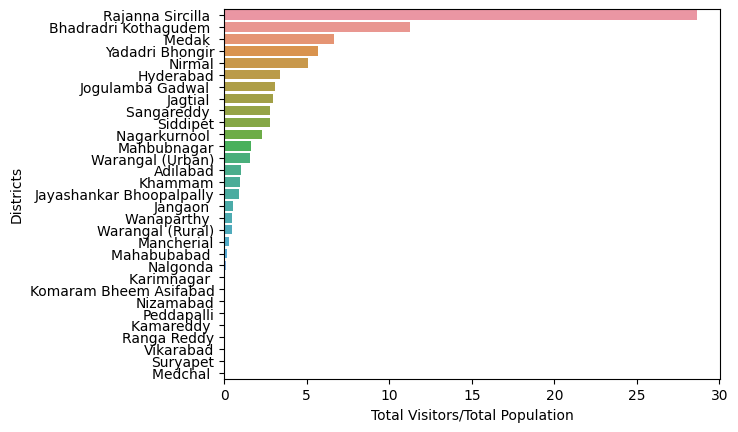

In [35]:
sns.barplot(data = population_df,y='Districts',x='Total Visitors/Total Population',orient= "h")
plt.show()